Pytorch - один из самых популярных фреймворков глубокого обучения для ML-специалистов. Фактически сегодня это еще и целая [экосистема](https://pytorch.org/ecosystem/) инструментов

[Тренды](https://paperswithcode.com/trends)

В библиотеке есть четыре ключевых составляющих:

- Развитый инструментарий для работы с тензорами. Он похож на numpy, но даёт дополнительные возможности по контролю выделяемой памяти, что важно при работе с большими моделями и данными.
- Простое построение динамического вычислительного графа, позволяющего получать градиенты целевых функций от параметров модели.
- Большой набор готовых слоёв для построения нейронных сетей произвольной архитектуры.
- Возможность перенаправлять вычисления на графические процессоры GPU.



[PyTorch — ваш новый фреймворк глубокого обучения](https://habr.com/ru/articles/334380/)

[Установка Pytorch](https://pytorch.org/get-started/locally/)

In [ ]:
import torch
torch.__version__

'2.0.1+cu118'

### Тензоры


[torch.tensor](https://pytorch.org/docs/stable/tensors.html)

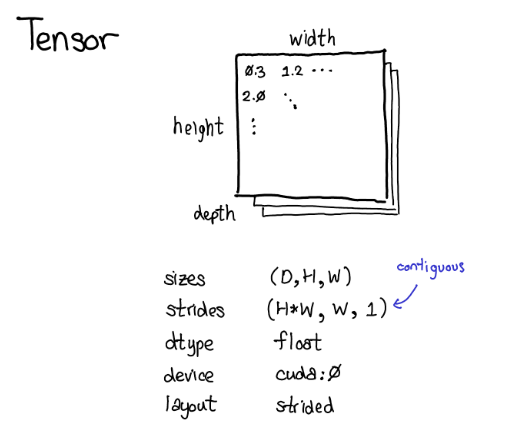

Создание тензора

In [ ]:
x = torch.empty(5, 3)
print(x)

tensor([[1.2830e-30, 4.5660e-41, 1.2830e-30],
        [4.5660e-41, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.0581e-29, 7.7052e+31, 7.2148e+22],
        [1.5766e-19, 1.0256e-08, 1.6802e-04]])


Случайная инициализация

In [ ]:
x = torch.rand(5, 3)
print(x)

tensor([[0.5757, 0.9862, 0.9390],
        [0.4469, 0.0555, 0.9531],
        [0.2341, 0.6784, 0.3187],
        [0.3332, 0.1889, 0.9331],
        [0.1560, 0.9407, 0.6215]])


Инициализация нулями

In [ ]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Создание непосредственно из данных

In [ ]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


Из другого тензора

In [ ]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # the same size as input that is filled with random numbers from a normal distribution, override dtype!
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.5430, -1.1023, -0.4141],
        [ 0.1194, -0.8296,  0.1189],
        [-1.4932,  1.1680,  0.8297],
        [-1.6932,  0.6430,  0.8139],
        [-1.5205, -1.4149,  0.3114]])


При преобразовании типа (если он меняется) под данные выделяется новая память

In [ ]:
x = torch.Tensor(5, 3)
y = x.long()
y = x.float()

Размер тензора

`.shape is an alias for .size(), and was added to more closely match numpy`

In [ ]:
x.size()

torch.Size([5, 3])

In [ ]:
x.shape

torch.Size([5, 3])

NB! The type torch.Size is an abstraction from a mere tuple, so it supports all the tuple operations

### Операции с тензорами


In [ ]:
y = torch.rand(5, 3)
print(x + y)

tensor([[-1.5674e+15,  6.7036e-02, -1.4255e+15],
        [ 4.4940e-01,  4.3429e-01,  2.2916e-01],
        [ 2.3941e-01,  2.9734e-01,  8.2927e+23],
        [ 9.2232e-01,  3.6547e-01,  6.6374e-01],
        [ 7.9506e-01,  2.5704e-02,  5.2623e-01]])


In [ ]:
print(torch.add(x, y))

tensor([[-1.5674e+15,  6.7036e-02, -1.4255e+15],
        [ 4.4940e-01,  4.3429e-01,  2.2916e-01],
        [ 2.3941e-01,  2.9734e-01,  8.2927e+23],
        [ 9.2232e-01,  3.6547e-01,  6.6374e-01],
        [ 7.9506e-01,  2.5704e-02,  5.2623e-01]])


Выходная переменная как параметр

In [ ]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[-1.5674e+15,  6.7036e-02, -1.4255e+15],
        [ 4.4940e-01,  4.3429e-01,  2.2916e-01],
        [ 2.3941e-01,  2.9734e-01,  8.2927e+23],
        [ 9.2232e-01,  3.6547e-01,  6.6374e-01],
        [ 7.9506e-01,  2.5704e-02,  5.2623e-01]])


in-place операции - operation_ syntax, новая память не выделяется

In [ ]:
x.add(y)

tensor([[-1.5674e+15,  6.7036e-02, -1.4255e+15],
        [ 4.4940e-01,  4.3429e-01,  2.2916e-01],
        [ 2.3941e-01,  2.9734e-01,  8.2927e+23],
        [ 9.2232e-01,  3.6547e-01,  6.6374e-01],
        [ 7.9506e-01,  2.5704e-02,  5.2623e-01]])

In [ ]:
x.add_(y)

tensor([[-1.5674e+15,  6.7036e-02, -1.4255e+15],
        [ 4.4940e-01,  4.3429e-01,  2.2916e-01],
        [ 2.3941e-01,  2.9734e-01,  8.2927e+23],
        [ 9.2232e-01,  3.6547e-01,  6.6374e-01],
        [ 7.9506e-01,  2.5704e-02,  5.2623e-01]])

Синтаксический сахар NumPy индексации

In [ ]:
print(x[:, 1])

tensor([0.0670, 0.4343, 0.2973, 0.3655, 0.0257])


Форма тензора (число индексов и их размерности) меняется функциями `view` и `reshape`

In [ ]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # Одна из размерностей может быть равна -1 и тогда она будет посчитана автоматически
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


`view` - создает другое представление исходного тензора. При изменении формы `view` меняется `x.stride()`. Новый тензор всегда делит (share) память с исходным тензором

`reshape` не дает гарантии на шэринг данных: сначала проверяется `is_contiguous` и если результа - False, вызывается `contiguous` (создаёт новую память). После этого вызывается `view`

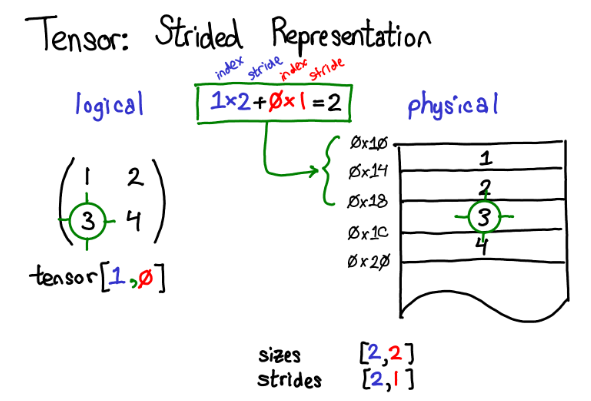

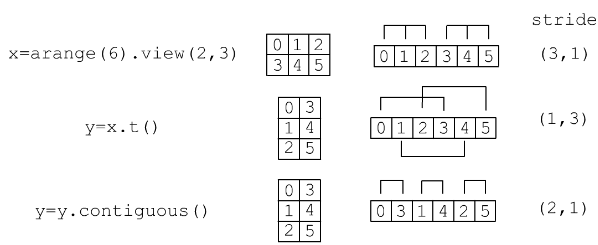

In [ ]:
x = torch.randn(4, 4)
y = x.reshape(16)
z = x.reshape(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


Получение значения тензора из одного элемента

In [ ]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-1.1409])
-1.1408767700195312


In [ ]:
y[1].item()

1.860625982284546

Проверка доступности GPU и создание тензора на GPU

[Технология CUDA: что это и как используется](https://www.nic.ru/help/tehnologiya-cuda-chto-eto-i-kak-ispol6zuetsya_11415.html) - Compute Unified Device Architecture

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))

tensor([-0.1409], device='cuda:0')
tensor([-0.1409], dtype=torch.float64)


Чтобы не прописывать device руками - [torch.cuda best practices](https://pytorch.org/docs/master/notes/cuda.html#best-practices)

In [ ]:
if torch.cuda.is_available():
  device = "cuda:0"
else:
  device = "cpu"
device

'cuda:0'

Выигрыш во времени от использования GPU

In [ ]:
%%time

x1 = torch.eye(10000)
y1 = torch.eye(10000)
z1 = x1.mm(y1)

CPU times: user 19.4 s, sys: 644 ms, total: 20 s
Wall time: 22.2 s


In [ ]:
%%time

x1 = torch.eye(10000, device=device)
y1 = torch.eye(10000, device=device)
z1 = x1.mm(y1)

CPU times: user 364 ms, sys: 239 ms, total: 603 ms
Wall time: 604 ms


[System Management Interface SMI](https://developer.nvidia.com/nvidia-system-management-interface)

In [ ]:
!nvidia-smi

Thu Sep 28 22:08:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    41W /  70W |   1959MiB / 15360MiB |     18%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Autograd - automatic differentiation engine

[PyTorch 101, Part 1: Understanding Graphs, Automatic Differentiation and Autograd](https://blog.paperspace.com/pytorch-101-understanding-graphs-and-automatic-differentiation/)

В центре большинства современных приемов машинного обучения лежит расчет градиентов. Это в особенности касается нейронных сетей, где для обновления весовых коэффициентов используется алгоритм обратного распространения

Autograd предоставляет классы и функции, реализующие автоматическое дифференцирование произвольных скалярных функций. Это требует минимальных изменений в существующем коде - нужно только объявить Tensor, для которого должны вычисляться градиенты, с атрибутом `requires_grad=True`

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
x.grad == None

True

In [ ]:
x.grad_fn == None

True

После применения какой-либо операции к тензору атрибуту `grad_fn`  присваивается объект `Function`, который добавляется в граф вычислений для обратного распространения градиента.



In [ ]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [ ]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


`.grad_fn` может меняться "на лету"

In [ ]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


Метод `backward` корневого узла графа вычислений запускает процедуру вычисления градиентов в листовых (is_leaf) узлах, имеющих атрибут requires_grad. Граф дифференцируется по цепочке (chain rule)

In [ ]:
out.backward()

In [ ]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


По умолчанию промежуточные (не листовые) узлы графа не хранят прошедшие через них градиентов.

In [ ]:
print(y.grad)

None


<ipython-input-33-b81046718426>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(y.grad)


Эту ситуацию можно изменить, вызвав для для конкретного узла метод retain_grad

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
y.retain_grad()
z = y * y * 3
out = z.mean()
out.backward()

In [ ]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [ ]:
print(y.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


Иногда с листовыми узлами необходимо проделать действия, не меняя при этом графа. Такие действия проводят, используя контекстный менедежр `no_grad`, которое блокирует создание новых узлов графа

In [ ]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad(): # потом можно включить вручную torch.enable_grad()
    print((x ** 2).requires_grad)

True
True
False


[inference mode](https://pytorch.org/docs/stable/generated/torch.inference_mode.html)




Inference mode is the **extreme version of no-grad** mode. Just like in no-grad mode, computations in inference mode are not recorded in the backward graph, but enabling inference mode will **allow PyTorch to speed up your model** even more. This better runtime comes with a drawback: **tensors created in inference mode will not be able to be used in computations to be recorded by autograd after exiting inference mode.**




При помощи метода `detach` можно получит "отсоединенный" от графа тензор, который будет ссылаться на данные исходного узла, но не быть частью графа

In [ ]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)

True
False


Еще про автоматическое дифференцирование в PyTorch:

[Особенности автоматического дифференцирования в PyTorch. Часть 1](https://habr.com/ru/companies/barsgroup/articles/719196/)

[Особенности автоматического дифференцирования в PyTorch. Часть 2](https://habr.com/ru/companies/barsgroup/articles/720676/)

## PyTorch text classification

In [ ]:
!pip install torchdata

In [ ]:
import time

import torch
from torch import nn
from torch.nn import functional as F
from torchtext.datasets import AG_NEWS
from torchtext.vocab import build_vocab_from_iterator

from torch.utils.data import DataLoader, Dataset
from torch.utils.data.dataset import random_split

from torchtext.data.utils import get_tokenizer
from torchtext.data.functional import to_map_style_dataset

In [ ]:
if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
else:
    DEVICE = torch.device("cpu")

[REPRODUCIBILITY](https://pytorch.org/docs/stable/notes/randomness.html)

In [ ]:
SEED = 1234
torch.manual_seed(SEED)

#### Load Dataset

[torchtext.datasets](https://pytorch.org/text/stable/datasets.html)

AG_NEWS is a collection of more than 1 million news articles. News articles have been gathered from more than 2000 news sources by ComeToMyHead in more than 1 year of activity. ComeToMyHead is an academic news search engine which has been running since July, 2004.

Метки:
- 1: World
- 2: Sports
- 3: Business
- 4: Sci/Tec

In [ ]:
#!pip install portalocker>=2.0.0

In [ ]:
train_iter = iter(AG_NEWS(split='train'))
next(train_iter)

(3,
 "Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.")

```
_basic_english_normalize - basic normalization for a line of text.
    Normalization includes
    - lowercasing
    - complete some basic text normalization for English words as follows:
        add spaces before and after '\''
        remove '\"',
        add spaces before and after '.'
        replace '<br \/>'with single space
        add spaces before and after ','
        add spaces before and after '('
        add spaces before and after ')'
        add spaces before and after '!'
        add spaces before and after '?'
        replace ';' with single space
        replace ':' with single space
        replace multiple spaces with single space
        Returns a list of tokens after splitting on whitespace.
```


In [ ]:
tokenizer = get_tokenizer('basic_english') # spacy / _basic_english_normalize / toktok
train_iter = AG_NEWS(split='train')

def yield_tokens(data_iter):
    for _, text in data_iter:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(train_iter), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

In [ ]:
vocab(['band', 'are', 'seeing', 'green', 'again'])

[3318, 42, 4009, 783, 325]

In [ ]:
text_pipeline = lambda x: vocab(tokenizer(x))
label_pipeline = lambda x: int(x) - 1

In [ ]:
def collate_batch(batch):
    label_list, text_list, offsets = [], [], [0]
    for (_label, _text) in batch:
         label_list.append(label_pipeline(_label))
         processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
         text_list.append(processed_text)
         offsets.append(processed_text.size(0))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)
    return label_list.to(device), text_list.to(device), offsets.to(device)

#### Make the dataset iterable

DataLoader оборачивает набор данных в итерируемый объект и поддерживает batching, sampling, shuffling. `batch_size=32` => каждую итерацию DataLoader будет возвращать пачку из 32 объектов и меток

In [ ]:
BATCH_SIZE = 32

In [ ]:
train_iter, test_iter = AG_NEWS()
train_dataset = to_map_style_dataset(train_iter) # map-style dataset is one that implements the __getitem__() and __len__() protocols
test_dataset = to_map_style_dataset(test_iter)

num_train = int(len(train_dataset) * 0.95)
split_train_, split_valid_ = random_split(train_dataset, [num_train, len(train_dataset) - num_train])

train_dataloader = DataLoader(split_train_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(split_valid_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)

In [ ]:

for idx, (label, text, offsets) in enumerate(train_dataloader):
  print(label)
  print(text)
  print(offsets)
  break
tensor([2, 0, 3, 3, 3, 3, 1, 0, 3, 3, 2, 0, 0, 1, 1, 3, 3, 0, 1, 3, 2, 3, 1, 2,
        2, 3, 0, 0, 3, 1, 0, 0], device='cuda:0')
tensor([8681,   12,    9,  ...,    4, 7028,    1], device='cuda:0')
tensor([   0,   42,   83,  125,  174,  214,  249,  289,  334,  375,  439,  472,
         518,  564,  604,  638,  683,  709,  764,  794,  844,  866,  901,  934,
         999, 1041, 1077, 1124, 1171, 1203, 1241, 1271], device='cuda:0')

In [ ]:
for idx, (label, text, offsets) in enumerate(train_dataloader):
  print(label)
  print(text)
  print(offsets)
  break

NameError: name 'train_dataloader' is not defined

#### Build the model

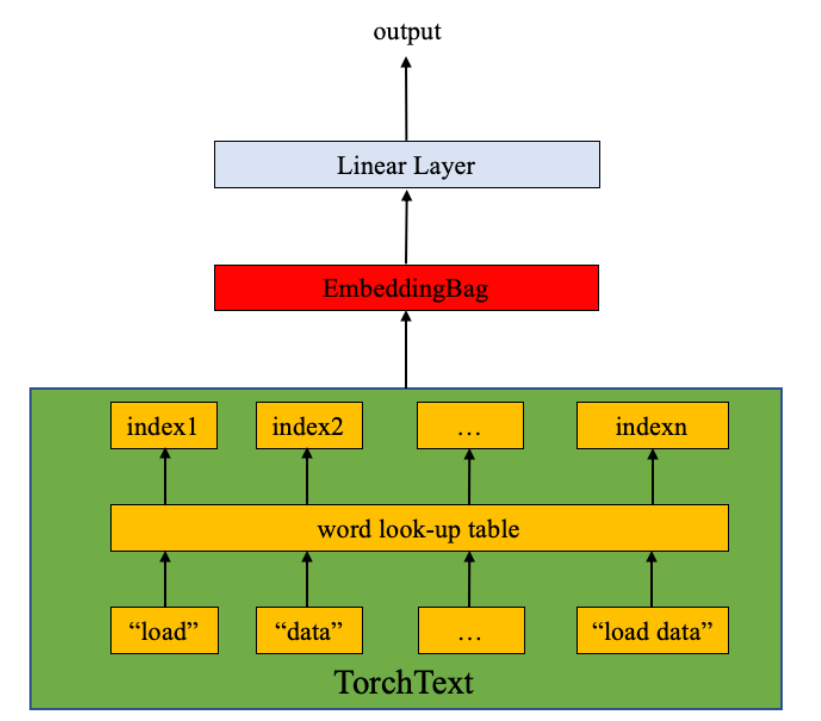

Для создания нейронной сети в PyTorch, мы создаем класс, который наследуется от [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html).
Определяем структуру сети в  `__init__` и определяем, как данные будут проходить по сети (forward pass).

In [ ]:
class TextClassificationModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True) # Computes sums or means of ‘bags’ of embeddings
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

In [ ]:
num_class = len(set([label for (label, text) in train_iter]))
vocab_size = len(vocab)
emsize = 64

EPOCHS = 10
BATCH_SIZE = 64

model = TextClassificationModel(vocab_size, emsize, num_class).to(device)

Для обучения модели нам нужны [loss function](https://pytorch.org/docs/stable/nn.html#loss-functions)
и [optimizer](https://pytorch.org/docs/stable/optim.html).



In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1)

Train/evaluate loops

In [ ]:
def train(dataloader):
    model.train()
    total_acc, total_count = 0, 0
    log_interval = 500
    start_time = time.time()

    for idx, (label, text, offsets) in enumerate(dataloader):
        optimizer.zero_grad()
        predicted_label = model(text, offsets)
        loss = criterion(predicted_label, label)
        loss.backward()
        optimizer.step()
        total_acc += (predicted_label.argmax(1) == label).sum().item()
        total_count += label.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print(
                "| epoch {:3d} | {:5d}/{:5d} batches "
                "| accuracy {:8.3f}".format(
                    epoch, idx, len(dataloader), total_acc / total_count
                )
            )
            total_acc, total_count = 0, 0
            start_time = time.time()

def evaluate(dataloader):
    model.eval() # == model.train(False)
    total_acc, total_count = 0, 0

    with torch.no_grad():
        for idx, (label, text, offsets) in enumerate(dataloader):
            predicted_label = model(text, offsets)
            loss = criterion(predicted_label, label)
            total_acc += (predicted_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
    return total_acc / total_count

In [ ]:
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
total_accu = None

for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(train_dataloader)
    accu_val = evaluate(valid_dataloader)
    if total_accu is not None and total_accu > accu_val:
      scheduler.step()
    else:
       total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val))
    print('-' * 59)

| epoch   1 |   500/ 3563 batches | accuracy    0.505
| epoch   1 |  1000/ 3563 batches | accuracy    0.755
| epoch   1 |  1500/ 3563 batches | accuracy    0.821
| epoch   1 |  2000/ 3563 batches | accuracy    0.847
| epoch   1 |  2500/ 3563 batches | accuracy    0.859
| epoch   1 |  3000/ 3563 batches | accuracy    0.872
| epoch   1 |  3500/ 3563 batches | accuracy    0.876
-----------------------------------------------------------
| end of epoch   1 | time:  9.90s | valid accuracy    0.867 
-----------------------------------------------------------
| epoch   2 |   500/ 3563 batches | accuracy    0.889
| epoch   2 |  1000/ 3563 batches | accuracy    0.893
| epoch   2 |  1500/ 3563 batches | accuracy    0.895
| epoch   2 |  2000/ 3563 batches | accuracy    0.894
| epoch   2 |  2500/ 3563 batches | accuracy    0.901
| epoch   2 |  3000/ 3563 batches | accuracy    0.899
| epoch   2 |  3500/ 3563 batches | accuracy    0.902
-----------------------------------------------------------
| e

In [ ]:
print('Checking the results of test dataset.')
accu_test = evaluate(test_dataloader)
print('test accuracy {:8.3f}'.format(accu_test))

Checking the results of test dataset.
test accuracy    0.905
